In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

def plot_svc_decision_boundary(clf, xmin, xmax,sv=True):
    #画出分类超平面
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    #计算超平面方程
    decision_boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    #上、下两条间隔平面
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    #标出支持向量的样本点
    if sv:
        svs = clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    #分别画出超平面及上下两条间隔平面
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)



C:\Users\lilin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lilin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


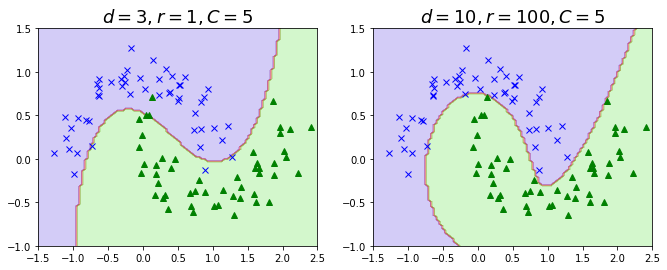

In [6]:
from sklearn.datasets import make_moons
def plot_dataset(X, y, axes):
    #画出数据集
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bx")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)

def plot_predictions(clf,axes):
    #画出分类超平面
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#创建两个参数不同的SVM模型,核函数为"poly"
polynomial_svm_clf1=svm.SVC(kernel="poly", degree=3, coef0=1, C=5)
polynomial_svm_clf1.fit(X,y)

polynomial_svm_clf2=svm.SVC(kernel="poly", degree=10, coef0=100, C=5)
polynomial_svm_clf2.fit(X,y)
#对比两个SVM模型结果，显示数据集及分类超平面
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(polynomial_svm_clf1,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.subplot(122)
plot_predictions(polynomial_svm_clf2,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

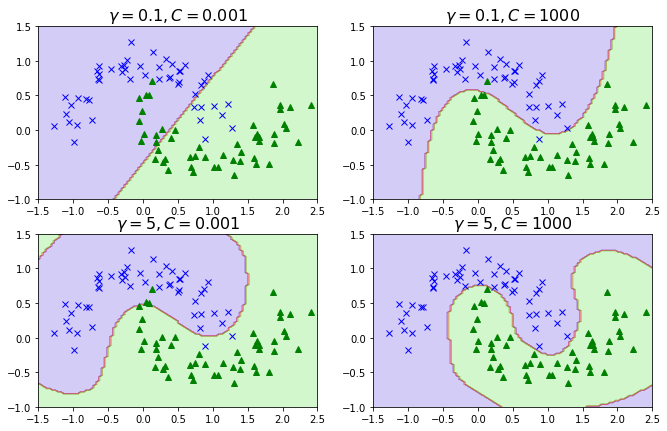

In [7]:
#设置参数
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
#创建SVM模型
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf =  svm.SVC(kernel="rbf", gamma=gamma, C=C)
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
#画图，对比结果
plt.figure(figsize=(11, 7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.01],'C': [0.1, 1,1000]},
                 {'kernel': ['linear'], 'C': [0.1, 1,10]},
                 {'kernel': ['poly'],'gamma': [1,0.1,0.01],'C': [0.1, 1,1000]}]
model_grid = GridSearchCV(SVC(), tuned_parameters, cv=5)
model_grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f"
      % (model_grid.best_params_, model_grid.best_score_))



The best parameters are {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.96
